<a href="https://colab.research.google.com/github/juanmanuelvillacis/statistical-analysis-project/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install feature_engine

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats #scientific python
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Iron Hack/Proyectos/Project_4/archive/races.csv')

- [Data Set](https://www.kaggle.com/gdaley/hkracing) 
- [Sectional Time and Distances](https://racing.hkjc.com/racing/english/racing-info/racing_course_time.aspx)

In [ ]:
df

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1,time2,time3,time4,time5,time6,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,NaN,NaN,NaN,NaN,24.05,46.69,70.39,NaN,NaN,NaN,NaN,5,13,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,4,13.77,22.22,24.88,22.82,NaN,NaN,NaN,13.77,35.99,60.87,83.69,NaN,NaN,NaN,11,1,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,1,24.33,22.47,22.09,NaN,NaN,NaN,NaN,24.33,46.80,68.89,NaN,NaN,NaN,NaN,5,3,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN
4,4,1997-06-02,ST,5,A,0,1600,GOOD TO FIRM,60-40,625000.0,4,25.45,23.52,23.31,23.56,NaN,NaN,NaN,25.45,48.97,72.28,95.84,NaN,NaN,NaN,2,10,1.0,NaN,15.5,28.0,17.5,NaN,2,36.5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6344,6344,2005-08-28,ST,6,A,0,1400,GOOD,115-95,2500000.0,1,13.65,23.10,24.60,21.78,NaN,NaN,NaN,13.65,36.75,61.35,83.13,NaN,NaN,NaN,6,7,5.0,NaN,13.5,14.5,62.5,NaN,6,38.0,NaN,NaN
6345,6345,2005-08-28,ST,7,A,0,1600,GOOD,G,23000000.0,11,24.48,22.54,23.01,23.45,NaN,NaN,NaN,24.48,47.02,70.03,93.48,NaN,NaN,NaN,5,6,14.0,NaN,18.0,20.5,45.0,NaN,5,60.0,NaN,NaN
6346,6346,2005-08-28,ST,8,A,0,2000,GOOD,G,25000000.0,11,26.79,23.31,23.24,23.46,24.15,NaN,NaN,26.79,50.10,73.34,96.80,120.95,NaN,NaN,2,8,5.0,NaN,11.0,27.5,38.5,NaN,2,17.5,NaN,NaN
6347,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,23.65,22.54,22.97,NaN,NaN,NaN,NaN,23.65,46.19,69.16,NaN,NaN,NaN,NaN,9,6,4.0,NaN,11.0,37.0,21.5,NaN,9,16.0,NaN,NaN


In [ ]:
df_runs.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

In [ ]:
df_runs = pd.read_csv('/content/drive/MyDrive/Iron Hack/Proyectos/Project_4/archive/runs.csv')

In [ ]:
df_runs

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,10,1238,6,0.0,1.25,5,AUS,Gelding,87,TT/V,1191.0,122,6,7,7,5,6.0,NaN,NaN,4.25,3.75,2.50,1.25,NaN,NaN,26.14,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,11,985,7,0.0,2.25,5,NZ,Gelding,84,--,1070.0,119,4,5,5,6,7.0,NaN,NaN,2.25,2.50,2.75,2.25,NaN,NaN,25.82,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,12,3147,10,0.0,3.00,5,NZ,Gelding,83,H/XB,1148.0,120,1,11,11,10,10.0,NaN,NaN,7.00,7.00,4.75,3.00,NaN,NaN,26.58,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,13,1982,8,0.0,2.50,3,AUS,Gelding,82,--,1266.0,119,12,10,10,11,8.0,NaN,NaN,7.00,6.75,5.00,2.50,NaN,NaN,26.58,24.02,23.45,22.29,NaN,NaN,96.34,4.6,NaN,118,95


#Merge tables runs.csv y race.cvs

In [ ]:
df_m = pd.merge(left=df,right=df_runs,how='inner',left_on='race_id',right_on='race_id')
df_m

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,sec_time4,sec_time5,sec_time6,sec_time7,time1_x,time2_x,time3_x,time4_x,time5_x,time6_x,time7,place_combination1,place_combination2,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,actual_weight,draw,position_sec1,position_sec2,position_sec3,position_sec4,position_sec5,position_sec6,behind_sec1,behind_sec2,behind_sec3,behind_sec4,behind_sec5,behind_sec6,time1_y,time2_y,time3_y,time4_y,time5_y,time6_y,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,1,3917,10,0.0,8.00,3,AUS,Gelding,60,--,1020.0,133,7,6,4,6,10.0,NaN,NaN,2.00,2.00,1.50,8.00,NaN,NaN,13.85,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118,2
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,2,2157,8,0.0,5.75,3,NZ,Gelding,60,--,980.0,133,12,12,13,13,8.0,NaN,NaN,6.50,9.00,5.00,5.75,NaN,NaN,14.57,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164,57
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,3,858,7,0.0,4.75,3,NZ,Gelding,60,--,1082.0,132,8,3,2,2,7.0,NaN,NaN,1.00,1.00,0.75,4.75,NaN,NaN,13.69,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137,18
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,4,1853,9,0.0,6.25,3,SAF,Gelding,60,--,1118.0,127,13,8,8,11,9.0,NaN,NaN,3.50,5.00,3.50,6.25,NaN,NaN,14.09,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80,59
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,5,13.53,21.59,23.94,23.58,NaN,NaN,NaN,13.53,35.12,59.06,82.64,NaN,NaN,NaN,8,11,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN,5,2796,6,0.0,3.75,3,GB,Gelding,60,--,972.0,131,14,13,12,12,6.0,NaN,NaN,7.75,8.75,4.25,3.75,NaN,NaN,14.77,21.75,23.22,23.50,NaN,NaN,83.24,50.0,14.0,9,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79442,6348,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,25.46,24.06,23.73,22.71,NaN,NaN,NaN,25.46,49.52,73.25,95.96,NaN,NaN,NaN,2,4,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN,10,1238,6,0.0,1.25,5,AUS,Gelding,87,TT/V,1191.0,122,6,7,7,5,6.0,NaN,NaN,4.25,3.75,2.50,1.25,NaN,NaN,26.14,23.98,23.53,22.52,NaN,NaN,96.17,99.0,NaN,73,40
79443,6348,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,25.46,24.06,23.73,22.71,NaN,NaN,NaN,25.46,49.52,73.25,95.96,NaN,NaN,NaN,2,4,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN,11,985,7,0.0,2.25,5,NZ,Gelding,84,--,1070.0,119,4,5,5,6,7.0,NaN,NaN,2.25,2.50,2.75,2.25,NaN,NaN,25.82,24.10,23.77,22.61,NaN,NaN,96.30,99.0,NaN,164,63
79444,6348,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,25.46,24.06,23.73,22.71,NaN,NaN,NaN,25.46,49.52,73.25,95.96,NaN,NaN,NaN,2,4,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN,12,3147,10,0.0,3.00,5,NZ,Gelding,83,H/XB,1148.0,120,1,11,11,10,10.0,NaN,NaN,7.00,7.00,4.75,3.00,NaN,NaN,26.58,24.06,23.37,22.43,NaN,NaN,96.44,99.0,NaN,111,68
79445,6348,2005-08-28,ST,10,A,0,1600,GOOD,100-80,1750000.0,2,25.46,24.06,23.73,22.71,NaN,NaN,NaN,25.46,49.52,73.25,95.96,NaN,NaN,NaN,2,4,8.0,NaN,38.0,63.0,18.5,NaN,2,134.0,NaN,NaN,13,1982,8,0.0,2.50,3,AUS,Gelding,82,--,1266.0,119,12,10,10,1

In [ ]:
new_cols = {'time1_x':'lider_time1', 'time2_x': 'lider_time2', 'time3_x':'lider_time3','time4_x': 'lider_time4', 'time5_x': 'lider_time5', 'time6_x':
       'lider_time6','time1_y':	'horse_time1',	'time2_y':	'horse_time2', 'time3_y' : 'horse_time3',	'time4_y':'horse_time4',	'time5_y':'horse_time5',
       'time6_y':'horse_time6','actual_weight': 'carried_weight'}
df_m.rename(columns=new_cols,inplace=True)
df_m.drop(columns=['time7','sec_time7','win_combination2','win_dividend2','place_dividend4','place_combination4'],inplace=True)

In [ ]:
cols_m = df_m.columns
cols_m

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'lider_time1', 'lider_time2', 'lider_time3', 'lider_time4',
       'lider_time5', 'lider_time6', 'place_combination1',
       'place_combination2', 'place_combination3', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'win_combination1',
       'win_dividend1', 'horse_no', 'horse_id', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'carried_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'position_sec4', 'position_sec5', 'position_sec6', 'behind_sec1',
       'behind_sec2', 'behind_sec3', 'behind_sec4', 'behind_sec5',
       'behind_sec6', 'horse_time1', 'horse_time2', 'horse_time3',
       'horse_time4', 'horse_time5', '

In [ ]:
df_m['date'] = pd.to_datetime(df_m['date'])

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79447 entries, 0 to 79446
Data columns (total 67 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   race_id             79447 non-null  int64         
 1   date                79447 non-null  datetime64[ns]
 2   venue               79447 non-null  object        
 3   race_no             79447 non-null  int64         
 4   config              79447 non-null  object        
 5   surface             79447 non-null  int64         
 6   distance            79447 non-null  int64         
 7   going               79447 non-null  object        
 8   horse_ratings       79447 non-null  object        
 9   prize               73598 non-null  float64       
 10  race_class          79447 non-null  int64         
 11  sec_time1           79447 non-null  float64       
 12  sec_time2           79447 non-null  float64       
 13  sec_time3           79447 non-null  float64   

### By 1200m Race and turf surface


In [ ]:
df_m_1200 = df_m[(df_m['distance']==1200)&(df_m['surface']==0)]

In [ ]:
cols_to_remove = ['horse_time4','horse_time5','horse_time6','lider_time4','lider_time5','lider_time6',
                        'sec_time4','sec_time5','sec_time6','position_sec4','position_sec5','position_sec6'
                        ,'behind_sec4','behind_sec5','behind_sec6']

In [ ]:

df_m_1200.drop(columns=cols_to_remove,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_m_1200.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'lider_time1', 'lider_time2', 'lider_time3',
       'place_combination1', 'place_combination2', 'place_combination3',
       'place_dividend1', 'place_dividend2', 'place_dividend3',
       'win_combination1', 'win_dividend1', 'horse_no', 'horse_id', 'result',
       'won', 'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'carried_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'behind_sec1', 'behind_sec2', 'behind_sec3', 'horse_time1',
       'horse_time2', 'horse_time3', 'finish_time', 'win_odds', 'place_odds',
       'trainer_id', 'jockey_id'],
      dtype='object')

In [ ]:
numerical = [col for col in df_m_1200.columns if df_m_1200[col].dtype != 'object']

df_m[numerical].head()

,race_id,date,race_no,surface,distance,prize,race_class,sec_time1,sec_time2,sec_time3,lider_time1,lider_time2,lider_time3,place_combination1,place_combination2,place_combination3,place_dividend1,place_dividend2,place_dividend3,win_combination1,win_dividend1,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_rating,declared_weight,carried_weight,draw,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,horse_time1,horse_time2,horse_time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1997-06-02,1,0,1400,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,6.0,36.5,25.5,18.0,8,121.0,1,3917,10,0.0,8.00,3,60,1020.0,133,7,6,4,6,2.00,2.00,1.50,13.85,21.59,23.86,83.92,9.7,3.7,118,2
1,0,1997-06-02,1,0,1400,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,6.0,36.5,25.5,18.0,8,121.0,2,2157,8,0.0,5.75,3,60,980.0,133,12,12,13,13,6.50,9.00,5.00,14.57,21.99,23.30,83.56,16.0,4.9,164,57
2,0,1997-06-02,1,0,1400,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,6.0,36.5,25.5,18.0,8,121.0,3,858,7,0.0,4.75,3,60,1082.0,132,8,3,2,2,1.00,1.00,0.75,13.69,21.59,23.90,83.40,3.5,1.5,137,18
3,0,1997-06-02,1,0,1400,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,6.0,36.5,25.5,18.0,8,121.0,4,1853,9,0.0,6.25,3,60,1118.0,127,13,8,8,11,3.50,5.00,3.50,14.09,21.83,23.70,83.62,39.0,11.0,80,59
4,0,1997-06-02,1,0,1400,485000.0,5,13.53,21.59,23.94,13.53,35.12,59.06,8,11,6.0,36.5,25.5,18.0,8,121.0,5,2796,6,0.0,3.75,3,60,972.0,131,14,13,12,12,7.75,8.75,4.25,14.77,21.75,23.22,83.24,50.0,14.0,9,154


In [ ]:
numerical_1200 = []
for c in numerical:
  if c not in cols_to_remove:
    numerical_1200.append(c)

In [ ]:
time = [var for var in numerical if 'time' in var or 'Time' in var]
time

['sec_time1',
 'sec_time2',
 'sec_time3',
 'lider_time1',
 'lider_time2',
 'lider_time3',
 'horse_time1',
 'horse_time2',
 'horse_time3',
 'finish_time']

In [ ]:
time_1200=[]
for c in time:
  if c not in cols_to_remove:
    time_1200.append(c)

In [ ]:
for var in df_m_1200.columns:
  if df_m_1200[var].isnull().sum() > 0:
    print(var, df_m_1200[var].isnull().mean())
    print()

prize 0.06774595267745953

place_combination3 0.0007970112079701121

place_dividend3 0.0007970112079701121

horse_country 4.9813200498132005e-05

horse_type 4.9813200498132005e-05

place_odds 0.05339975093399751



In [ ]:
df_m_1200[['horse_rating','horse_ratings']]

,horse_rating,horse_ratings
14,60,40-15
15,60,40-15
16,60,40-15
17,60,40-15
18,60,40-15
...,...,...
79428,85,100-80
79429,83,100-80
79430,83,100-80
79431,81,100-80


In [ ]:
sns.set(rc={'figure.figsize':(25,20)})
#sns.heatmap(df_m_1200.drop(columns=['distance','surface']).corr(), annot=True, cmap='coolwarm');

In [ ]:
# filtrar columnas por valores de corr > 0.7 con finish_time
corr_table = df_m_1200.corr()
corr_table ['finish_time'].sort_values(ascending=False)

finish_time           1.000000
horse_time3           0.720819
lider_time3           0.667223
horse_time2           0.584061
position_sec3         0.534535
result                0.534507
sec_time2             0.454486
lider_time2           0.449800
sec_time3             0.368851
lengths_behind        0.287012
behind_sec3           0.284548
behind_sec2           0.279342
place_odds            0.267150
win_odds              0.253024
horse_time1           0.244606
sec_time1             0.218282
lider_time1           0.218282
position_sec2         0.199178
behind_sec1           0.126214
position_sec1         0.124984
jockey_id             0.088911
draw                  0.078845
horse_no              0.051065
place_dividend1       0.027257
place_combination2    0.021307
place_dividend2       0.014397
win_dividend1         0.011426
place_combination3    0.008850
win_combination1      0.007854
place_combination1    0.007668
trainer_id           -0.003424
place_dividend3      -0.003494
horse_id

In [ ]:
'''for var in time_1200:
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  fig = df_m_1200.boxplot(column=var)
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = df_m_1200[var].hist(bins=20)
  fig.set_xlabel('tiempo')
  fig.set_ylabel(var)

  plt.show();
'''

"for var in time_1200:\n  plt.figure(figsize=(8, 4))\n  plt.subplot(1, 2, 1)\n  fig = df_m_1200.boxplot(column=var)\n  fig.set_ylabel(var)\n\n  plt.subplot(1, 2, 2)\n  fig = df_m_1200[var].hist(bins=20)\n  fig.set_xlabel('tiempo')\n  fig.set_ylabel(var)\n\n  plt.show();\n"

In [ ]:
df_m_1200_clean['horse_rating'].sort_values().value_counts()

60     12206
52       561
67       238
65       203
50       194
       ...  
127        2
17         1
134        1
138        1
13         1
Name: horse_rating, Length: 119, dtype: int64

In [ ]:
'''sns.set(rc={'figure.figsize':(18,13)})
for col in df_m_1200_clean.columns:
  sns.scatterplot(y=df_m_1200_clean[col], x=df_m_1200_clean['finish_time'])
  plt.show()
'''

"sns.set(rc={'figure.figsize':(18,13)})\nfor col in df_m_1200_clean.columns:\n  sns.scatterplot(y=df_m_1200_clean[col], x=df_m_1200_clean['finish_time'])\n  plt.show()\n"

### Cols by dtype:
 numerical, time, ids, discrete y object_dtype

In [ ]:
df_m['date'].dtype

dtype('<M8[ns]')

In [ ]:
object_cols = [col for col in df_m_1200.columns if df_m_1200[col].dtype == 'object']
object_cols

['venue',
 'config',
 'going',
 'horse_ratings',
 'horse_country',
 'horse_type',
 'horse_gear']

In [ ]:
ids = [var for var in numerical if '_id' in var or '_Id' in var]
ids

['race_id', 'horse_id', 'trainer_id', 'jockey_id']

In [ ]:
discrete = []

for var in numerical:
  if len(df_m_1200[var].unique()) < 20:
    print(var, ' values:', df_m_1200[var].unique())
    discrete.append(var)

print()
print(f'Numero de variables discretas: {len(discrete)}')

race_no  values: [ 2  4  6 10  3  8  7  1  9 11  5]
surface  values: [0]
distance  values: [1200]
race_class  values: [ 5  1  4  3  2 13  0 12 11  6]
place_combination1  values: [ 5  9  1  8 10  3  7 11  2  4 12  6 14 13]
place_combination2  values: [13  3 14  6  7  9  2  5 11 10  4 12  1  8]
place_combination3  values: [ 4. 10.  8.  6.  7. 11.  3.  2.  1.  9. 13. 12.  5. 14. nan]
win_combination1  values: [ 5  9  1  8 10  3  7 11  2  4 12  6 14 13]
horse_no  values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14]
result  values: [12 10  8  3  1 11 14  5  9  4 13  7  2  6]
won  values: [0. 1.]
horse_age  values: [ 3  2  4  5  6  7  8  9 10]
draw  values: [ 9  8  5 11 10  2 13  7 12  1 14  3  6  4]
position_sec1  values: [11 12  8 14  5  4 13  3  9  6  7  1  2 10]
position_sec2  values: [13 11  9 14  4  5 12  3 10  6  8  1  2  7]
position_sec3  values: [12 10  8  3  1 11 14  5  9  4 13  7  2  6]

Numero de variables discretas: 16


In [ ]:
numerical = [var for var in numerical if var not in discrete 
             and var not in ids and var not in time]
numerical ,len(numerical)

(['date',
  'prize',
  'place_dividend1',
  'place_dividend2',
  'place_dividend3',
  'win_dividend1',
  'lengths_behind',
  'horse_rating',
  'declared_weight',
  'carried_weight',
  'behind_sec1',
  'behind_sec2',
  'behind_sec3',
  'win_odds',
  'place_odds'],
 15)

In [ ]:
clasified_cols = numerical+time+ids+discrete+object_cols
for c in df_m.columns:
  if c not in clasified_cols:
    print(c)
len(numerical)+len(time)+len(ids)+len(discrete)+len(object_cols), len(df_m.columns)

sec_time4
sec_time5
sec_time6
lider_time4
lider_time5
lider_time6
position_sec4
position_sec5
position_sec6
behind_sec4
behind_sec5
behind_sec6
horse_time4
horse_time5
horse_time6


(52, 67)

###sccattering and histograms

In [ ]:
df_m['finish_time'].max() ,  df_m['finish_time'].min()

(163.58, 55.16)

In [ ]:
cols_to_scatter = numerical_1200+object_cols+time

In [ ]:
'''for col in cols_to_scatter:
  sns.scatterplot(x=df_m_1200['finish_time'], y=df_m_1200[col])
  plt.show()
  '''

"for col in cols_to_scatter:\n  sns.scatterplot(x=df_m_1200['finish_time'], y=df_m_1200[col])\n  plt.show()\n  "

### Outliers

In [ ]:

q1 = np.percentile(df_m_1200['finish_time'], 25)
q3 = np.percentile(df_m_1200['finish_time'], 75)

iqr = q3 - q1 

upper = q3 + (iqr*1.5)
lower = q1 - (iqr*1.5)

In [ ]:
len(df_m_1200[(df_m_1200['finish_time'] < lower) | (df_m_1200['finish_time'] > upper)]) , len(df_m_1200['finish_time']) , len(df_m_1200[(df_m_1200['finish_time'] < lower) | (df_m_1200['finish_time'] > upper)]) / len(df_m_1200['finish_time']) 

(565, 20075, 0.028144458281444584)

In [ ]:
df_m_1200_clean = df_m_1200[df_m_1200['finish_time'] < upper]

In [ ]:
df_m_1200_clean

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,lider_time1,lider_time2,lider_time3,place_combination1,place_combination2,place_combination3,place_dividend1,place_dividend2,place_dividend3,win_combination1,win_dividend1,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,carried_weight,draw,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,horse_time1,horse_time2,horse_time3,finish_time,win_odds,place_odds,trainer_id,jockey_id
14,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,1,2397,12,0.0,10.00,3,NZ,Gelding,60,--,1078.0,128,9,11,13,12,6.00,7.75,10.00,25.01,22.92,24.05,71.98,14.0,4.2,47,149
15,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,2,4181,10,0.0,6.75,3,NZ,Gelding,60,--,1257.0,132,8,12,11,10,6.25,7.50,6.75,25.05,22.84,23.58,71.47,28.0,8.5,98,64
16,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,3,2814,8,0.0,3.75,3,AUS,Horse,60,--,1037.0,130,5,8,9,8,4.50,6.25,3.75,24.77,22.92,23.29,70.98,7.0,1.7,75,183
17,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,4,905,3,0.0,2.25,3,AUS,Gelding,60,--,1168.0,126,11,14,14,3,6.75,8.00,2.25,25.13,22.84,22.75,70.72,12.0,3.3,29,18
18,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,5,3915,1,1.0,0.00,3,AUS,Gelding,60,--,1148.0,125,10,5,4,1,3.00,4.00,1.25,24.53,22.80,23.06,70.39,2.3,1.2,118,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79428,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,10,4355,12,0.0,9.25,4,AUS,Gelding,85,B/H,1193.0,112,2,6,4,12,1.50,1.50,9.25,23.89,22.54,24.19,70.62,23.0,NaN,73,86
79429,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,11,1702,13,0.0,10.25,6,AUS,Gelding,83,V,1188.0,120,3,3,6,13,0.75,2.75,10.25,23.77,22.86,24.16,70.79,99.0,NaN,80,17
79430,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,12,2576,9,0.0,5.25,5,GB,Gelding,83,B,1103.0,118,14,2,2,9,0.15,0.50,5.25,23.65,22.62,23.72,69.99,99.0,NaN,55,40
79431,6347,2005-08-28,ST,9,A,0,1200,GOOD,100-80,1750000.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,13,1391,14,0.0,10.75,4,AUS,Gelding,81,H/XB,1121.0,116,12,5,8,14,1.50,3.00,10.75,23.89,22.78,24.21,70.88,99.0,NaN,47,76


In [ ]:
df_m_1200['finish_time'].max() , df_m_1200_clean['finish_time'].max()

(99.68, 72.91)

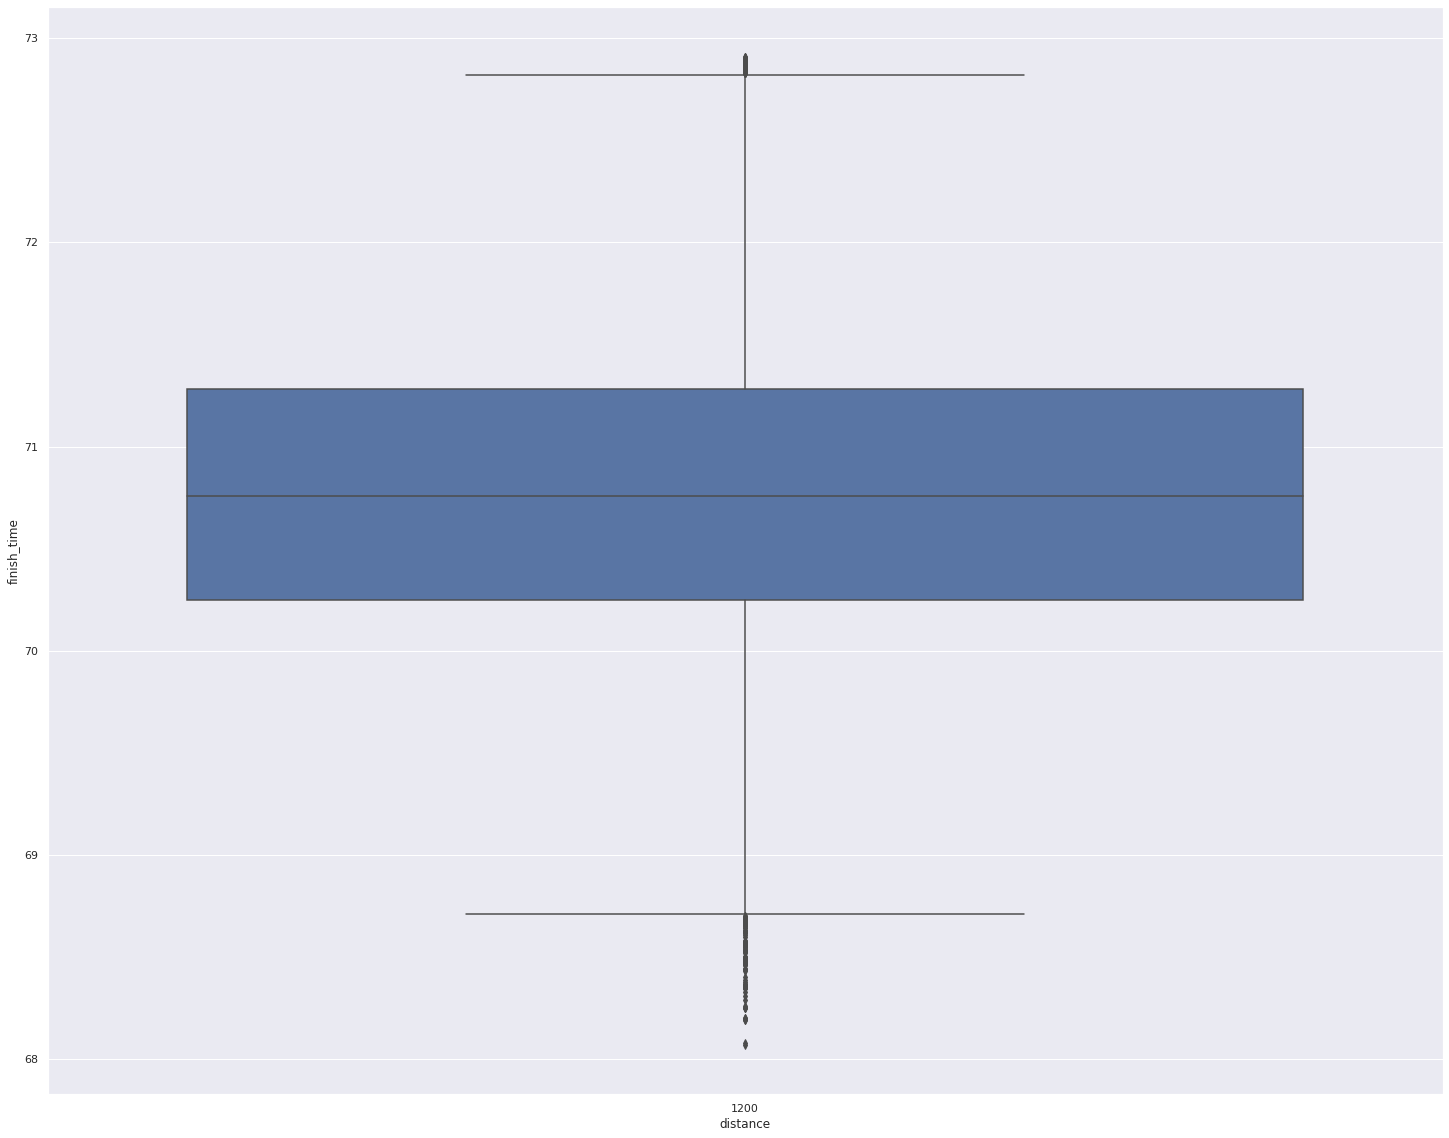

In [ ]:
sns.boxplot(x=df_m_1200_clean['distance'], y=df_m_1200_clean['finish_time'])

In [ ]:
df_m_1200['prize'].describe()

count    1.871500e+04
mean     1.030741e+06
std      1.266203e+06
min      4.850000e+05
25%      6.750000e+05
50%      8.400000e+05
75%      1.060000e+06
max      1.850000e+07
Name: prize, dtype: float64

In [ ]:
q1 = 6.750000e+05
q3 = 1.060000e+06
iqr = q3 - q1
upper = q3 + (iqr*3)
lower = q1 - (iqr*1.5)

In [ ]:
len(df_m_1200[(df_m_1200['prize'] < lower) | (df_m_1200['prize'] > upper)]) , len(df_m_1200['prize']) , len(df_m_1200[(df_m_1200['prize'] < lower) | (df_m_1200['prize'] > upper)]) / len(df_m_1200['prize']) 

(608, 20075, 0.030286425902864258)

In [ ]:
df_m_1200_clean['prize'] = df_m_1200[df_m_1200['prize'] < upper]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


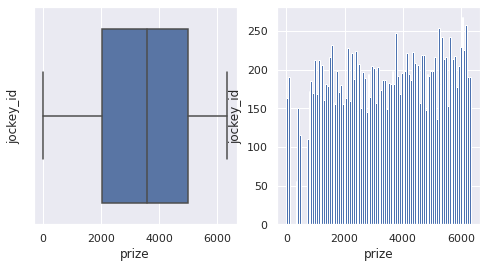

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(df_m_1200_clean['prize'])
fig.set_ylabel(var)

plt.subplot(1, 2, 2)
fig = df_m_1200_clean['prize'].hist(bins=100)
fig.set_xlabel('prize')
fig.set_ylabel(var)

plt.show();

place odds

In [ ]:
df_m_1200_clean.place_odds.describe()

count    18542.000000
mean         7.673946
std          9.174745
min          1.000000
25%          2.300000
50%          4.100000
75%          9.000000
max         87.000000
Name: place_odds, dtype: float64

In [ ]:
df_m_1200_clean.place_odds.isna().sum()/len(df_m_1200_clean.place_odds)

0.05364160669626908

In [ ]:
df_m_1200_clean.place_odds.median()

4.1

In [ ]:
q1 = 2.300000
q3 = 9.000000
iqr = q3 - q1
upper = q3 + (iqr*3)
lower = q1 - (iqr*1.5)

In [ ]:
len(df_m_1200[(df_m_1200['place_odds'] < lower) | (df_m_1200['place_odds'] > upper)]) , len(df_m_1200['place_odds']) , len(df_m_1200[(df_m_1200['place_odds'] < lower) | (df_m_1200['place_odds'] > upper)]) / len(df_m_1200['place_odds']) 

(864, 20075, 0.04303860523038605)

In [ ]:
df_m_1200_clean['place_odds'] = df_m_1200[df_m_1200['place_odds'] < upper]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


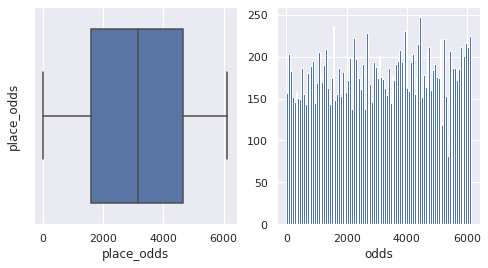

In [ ]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
fig = sns.boxplot(df_m_1200_clean['place_odds'])
fig.set_ylabel('place_odds')

plt.subplot(1, 2, 2)
fig = df_m_1200_clean['place_odds'].hist(bins=100)
fig.set_xlabel('odds')
fig.set_ylabel('')

plt.show();

### Fill NA

In [ ]:
df_m_1200.isnull().sum() / len(df_m_1200) * 100

race_id               0.000000
date                  0.000000
venue                 0.000000
race_no               0.000000
config                0.000000
surface               0.000000
distance              0.000000
going                 0.000000
horse_ratings         0.000000
prize                 6.774595
race_class            0.000000
sec_time1             0.000000
sec_time2             0.000000
sec_time3             0.000000
lider_time1           0.000000
lider_time2           0.000000
lider_time3           0.000000
place_combination1    0.000000
place_combination2    0.000000
place_combination3    0.079701
place_dividend1       0.000000
place_dividend2       0.000000
place_dividend3       0.079701
win_combination1      0.000000
win_dividend1         0.000000
horse_no              0.000000
horse_id              0.000000
result                0.000000
won                   0.000000
lengths_behind        0.000000
horse_age             0.000000
horse_country         0.004981
horse_ty

In [ ]:
na_vals = df_m_1200_clean.isna().sum()
for i,a in enumerate(na_vals):
  if a>0:
    print(na_vals.index[i],a)

prize 1862
place_combination3 16
place_dividend3 16
horse_country 1
horse_type 1
place_odds 1849


In [ ]:
df_m_1200_clean['prize'].isna().sum()/len(df_m_1200_clean['prize'])*100

9.503394069310469

In [ ]:
df_m_1200_clean['prize'].fillna(value=df_m_1200_clean['prize'].median(),inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_m_1200_clean['place_odds'].fillna(value=df_m_1200_clean['place_odds'].median(),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_m_1200_clean.drop(index=df_m_1200_clean[df_m_1200_clean['place_combination3'].isna()].index.values,inplace=True)
df_m_1200_clean.drop(index=df_m_1200_clean[df_m_1200_clean['place_dividend3'].isna()].index.values,inplace=True)
df_m_1200_clean.drop(index=df_m_1200_clean[df_m_1200_clean['horse_country'].isna()].index.values,inplace=True)
df_m_1200_clean.drop(index=df_m_1200_clean[df_m_1200_clean['horse_type'].isna()].index.values,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
'''for var in df_m_1200_clean.columns:
  plt.figure(figsize=(8, 4))
  plt.subplot(1, 2, 1)
  fig = df_m_1200_clean.boxplot(column=var)
  fig.set_ylabel(var)

  plt.subplot(1, 2, 2)
  fig = df_m_1200_clean[var].hist(bins=20)
  fig.set_xlabel('tiempo')
  fig.set_ylabel(var)

  plt.show();
  '''

"for var in df_m_1200_clean.columns:\n  plt.figure(figsize=(8, 4))\n  plt.subplot(1, 2, 1)\n  fig = df_m_1200_clean.boxplot(column=var)\n  fig.set_ylabel(var)\n\n  plt.subplot(1, 2, 2)\n  fig = df_m_1200_clean[var].hist(bins=20)\n  fig.set_xlabel('tiempo')\n  fig.set_ylabel(var)\n\n  plt.show();\n  "

### One hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_m_1200.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'lider_time1', 'lider_time2', 'lider_time3',
       'place_combination1', 'place_combination2', 'place_combination3',
       'place_dividend1', 'place_dividend2', 'place_dividend3',
       'win_combination1', 'win_dividend1', 'horse_no', 'horse_id', 'result',
       'won', 'lengths_behind', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'carried_weight',
       'draw', 'position_sec1', 'position_sec2', 'position_sec3',
       'behind_sec1', 'behind_sec2', 'behind_sec3', 'horse_time1',
       'horse_time2', 'horse_time3', 'finish_time', 'win_odds', 'place_odds',
       'trainer_id', 'jockey_id'],
      dtype='object')

In [ ]:
one_hot = OneHotEncoder()

In [ ]:
one_hot.fit(df_m_1200[['going']]).categories_

[array(['GOOD', 'GOOD TO FIRM', 'GOOD TO YIELDING', 'SOFT', 'YIELDING',
        'YIELDING TO SOFT'], dtype=object)]

In [ ]:
df_m_1200_clean[['GOOD', 'GOOD TO FIRM', 'GOOD TO YIELDING', 'SOFT', 'YIELDING', 'YIELDING TO SOFT']] = one_hot.fit_transform(df_m_1200_clean[['going']]).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
df_m_1200_clean.drop(columns=['going','GOOD'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_m_1200_clean

,race_id,date,venue,race_no,config,surface,distance,horse_ratings,prize,race_class,sec_time1,sec_time2,sec_time3,lider_time1,lider_time2,lider_time3,place_combination1,place_combination2,place_combination3,place_dividend1,place_dividend2,place_dividend3,win_combination1,win_dividend1,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,horse_gear,declared_weight,carried_weight,draw,position_sec1,position_sec2,position_sec3,behind_sec1,behind_sec2,behind_sec3,horse_time1,horse_time2,horse_time3,finish_time,win_odds,place_odds,trainer_id,jockey_id,GOOD TO FIRM,GOOD TO YIELDING,SOFT,YIELDING,YIELDING TO SOFT
14,1,1997-06-02,ST,2,A,0,1200,40-15,1.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,1,2397,12,0.0,10.00,3,NZ,Gelding,60,--,1078.0,128,9,11,13,12,6.00,7.75,10.00,25.01,22.92,24.05,71.98,14.0,1.0,47,149,1.0,0.0,0.0,0.0,0.0
15,1,1997-06-02,ST,2,A,0,1200,40-15,1.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,2,4181,10,0.0,6.75,3,NZ,Gelding,60,--,1257.0,132,8,12,11,10,6.25,7.50,6.75,25.05,22.84,23.58,71.47,28.0,1.0,98,64,1.0,0.0,0.0,0.0,0.0
16,1,1997-06-02,ST,2,A,0,1200,40-15,1.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,3,2814,8,0.0,3.75,3,AUS,Horse,60,--,1037.0,130,5,8,9,8,4.50,6.25,3.75,24.77,22.92,23.29,70.98,7.0,1.0,75,183,1.0,0.0,0.0,0.0,0.0
17,1,1997-06-02,ST,2,A,0,1200,40-15,1.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,4,905,3,0.0,2.25,3,AUS,Gelding,60,--,1168.0,126,11,14,14,3,6.75,8.00,2.25,25.13,22.84,22.75,70.72,12.0,1.0,29,18,1.0,0.0,0.0,0.0,0.0
18,1,1997-06-02,ST,2,A,0,1200,40-15,1.0,5,24.05,22.64,23.70,24.05,46.69,70.39,5,13,4.0,12.5,47.0,33.5,5,23.5,5,3915,1,1.0,0.00,3,AUS,Gelding,60,--,1148.0,125,10,5,4,1,3.00,4.00,1.25,24.53,22.80,23.06,70.39,2.3,1.0,118,2,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79428,6347,2005-08-28,ST,9,A,0,1200,100-80,6347.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,10,4355,12,0.0,9.25,4,AUS,Gelding,85,B/H,1193.0,112,2,6,4,12,1.50,1.50,9.25,23.89,22.54,24.19,70.62,23.0,3147.0,73,86,0.0,0.0,0.0,0.0,0.0
79429,6347,2005-08-28,ST,9,A,0,1200,100-80,6347.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,11,1702,13,0.0,10.25,6,AUS,Gelding,83,V,1188.0,120,3,3,6,13,0.75,2.75,10.25,23.77,22.86,24.16,70.79,99.0,3147.0,80,17,0.0,0.0,0.0,0.0,0.0
79430,6347,2005-08-28,ST,9,A,0,1200,100-80,6347.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,12,2576,9,0.0,5.25,5,GB,Gelding,83,B,1103.0,118,14,2,2,9,0.15,0.50,5.25,23.65,22.62,23.72,69.99,99.0,3147.0,55,40,0.0,0.0,0.0,0.0,0.0
79431,6347,2005-08-28,ST,9,A,0,1200,100-80,6347.0,2,23.65,22.54,22.97,23.65,46.19,69.16,9,6,4.0,11.0,37.0,21.5,9,16.0,13,1391,14,0.0,10.75,4,AUS,Gelding,81,H/XB,1121.0,116,12,5,8,14,1.50,3.00,10.75,23.89,22.78,24.21,70.88,99.0,3147.0,47,76,0.0,0.0,0.0,0.0,0.0


## Model with numeric variables


In [ ]:
from feature_engine import imputation as mdi
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [ ]:
cols_to_model_drop = [ 'venue','race_id','date','race_no','config','surface','distance','horse_ratings', 'race_class',
       'horse_type','sec_time2','sec_time1','place_combination1','place_dividend1','position_sec3','behind_sec3','horse_country', 
       'horse_gear','lider_time3','trainer_id','jockey_id','horse_id','horse_time3','sec_time3']

In [ ]:
df_m_1200_clean.drop(columns=cols_to_model_drop,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_m_1200_clean.columns

Index(['prize', 'lider_time1', 'lider_time2', 'place_combination2',
       'place_combination3', 'place_dividend2', 'place_dividend3',
       'win_combination1', 'win_dividend1', 'horse_no', 'result', 'won',
       'lengths_behind', 'horse_age', 'horse_rating', 'declared_weight',
       'carried_weight', 'draw', 'position_sec1', 'position_sec2',
       'behind_sec1', 'behind_sec2', 'horse_time1', 'horse_time2',
       'finish_time', 'win_odds', 'place_odds', 'GOOD TO FIRM',
       'GOOD TO YIELDING', 'SOFT', 'YIELDING', 'YIELDING TO SOFT'],
      dtype='object')

In [ ]:
df_m_1200_clean

,prize,lider_time1,lider_time2,place_combination2,place_combination3,place_dividend2,place_dividend3,win_combination1,win_dividend1,horse_no,result,won,lengths_behind,horse_age,horse_rating,declared_weight,carried_weight,draw,position_sec1,position_sec2,behind_sec1,behind_sec2,horse_time1,horse_time2,finish_time,win_odds,place_odds,GOOD TO FIRM,GOOD TO YIELDING,SOFT,YIELDING,YIELDING TO SOFT
14,1.0,24.05,46.69,13,4.0,47.0,33.5,5,23.5,1,12,0.0,10.00,3,60,1078.0,128,9,11,13,6.00,7.75,25.01,22.92,71.98,14.0,1.0,1.0,0.0,0.0,0.0,0.0
15,1.0,24.05,46.69,13,4.0,47.0,33.5,5,23.5,2,10,0.0,6.75,3,60,1257.0,132,8,12,11,6.25,7.50,25.05,22.84,71.47,28.0,1.0,1.0,0.0,0.0,0.0,0.0
16,1.0,24.05,46.69,13,4.0,47.0,33.5,5,23.5,3,8,0.0,3.75,3,60,1037.0,130,5,8,9,4.50,6.25,24.77,22.92,70.98,7.0,1.0,1.0,0.0,0.0,0.0,0.0
17,1.0,24.05,46.69,13,4.0,47.0,33.5,5,23.5,4,3,0.0,2.25,3,60,1168.0,126,11,14,14,6.75,8.00,25.13,22.84,70.72,12.0,1.0,1.0,0.0,0.0,0.0,0.0
18,1.0,24.05,46.69,13,4.0,47.0,33.5,5,23.5,5,1,1.0,0.00,3,60,1148.0,125,10,5,4,3.00,4.00,24.53,22.80,70.39,2.3,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79428,6347.0,23.65,46.19,6,4.0,37.0,21.5,9,16.0,10,12,0.0,9.25,4,85,1193.0,112,2,6,4,1.50,1.50,23.89,22.54,70.62,23.0,3147.0,0.0,0.0,0.0,0.0,0.0
79429,6347.0,23.65,46.19,6,4.0,37.0,21.5,9,16.0,11,13,0.0,10.25,6,83,1188.0,120,3,3,6,0.75,2.75,23.77,22.86,70.79,99.0,3147.0,0.0,0.0,0.0,0.0,0.0
79430,6347.0,23.65,46.19,6,4.0,37.0,21.5,9,16.0,12,9,0.0,5.25,5,83,1103.0,118,14,2,2,0.15,0.50,23.65,22.62,69.99,99.0,3147.0,0.0,0.0,0.0,0.0,0.0
79431,6347.0,23.65,46.19,6,4.0,37.0,21.5,9,16.0,13,14,0.0,10.75,4,81,1121.0,116,12,5,8,1.50,3.00,23.89,22.78,70.88,99.0,3147.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_m_1200_clean.drop('finish_time',axis=1),
                                                    df_m_1200_clean['finish_time'], test_size=0.2, 
                               train_size=0.8, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((15660, 31), (3916, 31))

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)
y_pred[:15]

array([69.34630354, 69.46653291, 71.34857904, 70.01096629, 70.42666252,
       70.91819669, 70.86158939, 71.69176831, 70.5047208 , 70.91960079,
       71.97628205, 72.52170811, 69.35059154, 70.74696285, 71.6387507 ])

In [ ]:
r2_score(y_pred, y_test)

0.7426420815364563

In [ ]:
model.coef_

array([-2.80870415e-05, -7.61216825e-01,  9.53484380e-01, -8.94712392e-04,
       -8.92402466e-04,  1.60261694e-04,  7.41628515e-04,  1.89765536e-03,
        2.56141877e-04,  6.23672298e-03,  2.68607971e-02, -2.66005504e-03,
        1.20477929e-01,  1.63786825e-02, -1.06188714e-02, -3.30676413e-04,
        7.93191110e-03,  2.21990228e-03,  4.17465801e-02, -5.02214308e-02,
       -1.13019188e-01,  1.31681730e-01,  3.61192139e-02,  4.36808812e-02,
       -8.36188277e-04, -1.32221310e-05, -2.23513643e-01,  2.46789973e-01,
        6.44020875e-01,  3.60368376e-01,  8.94169568e-01])

In [ ]:
y_pred = model.predict(X_train)
y_pred[:15]

array([70.51565533, 70.95165179, 71.26727736, 71.19627164, 72.30695409,
       70.3115953 , 70.67830548, 70.80112438, 70.81632475, 70.89102627,
       71.1218919 , 71.18077838, 71.63603108, 69.84416098, 69.59946248])

In [ ]:
r2_score(y_pred, y_train)

0.7351192804868798

### Lasso

In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.coef_

array([-1.80085194e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.20537063e-05, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.15164975e-02, -0.00000000e+00, -1.11916847e-02, -7.14248131e-04,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.52210171e-03, -3.79784277e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
for i,a in enumerate(lasso.coef_):
  if a != 0:
    print(df_m_1200_clean.drop(columns='finish_time').columns[i])

prize
win_dividend1
lengths_behind
horse_rating
declared_weight
win_odds
place_odds


In [ ]:
df_m_1200_clean.win_dividend1.value_counts()

29.5     205
26.5     200
26.0     199
48.0     192
29.0     185
        ... 
250.5      8
288.0      8
140.5      8
12.5       7
215.5      5
Name: win_dividend1, Length: 417, dtype: int64

In [ ]:
y_predict = lasso.predict(X_test)

In [ ]:
r2_score(y_test, y_predict)

0.2587411238368298

In [ ]:
lasso = Lasso(alpha=40)
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.008431975469055386

In [ ]:
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.32110051e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
lasso_best = Lasso()

#### Grid Search

In [ ]:
cv = RepeatedKFold(n_splits=8, n_repeats=10)

In [ ]:
grid = dict()
grid['alpha'] = np.random.randint(10,100,size=50)
grid

{'alpha': array([76, 96, 33, 40, 58, 96, 78, 58, 50, 94, 40, 35, 94, 60, 58, 44, 91,
        86, 14, 43, 16, 79, 59, 80, 50, 70, 80, 59, 78, 33, 65, 66, 96, 24,
        44, 83, 93, 20, 16, 16, 11, 35, 80, 46, 98, 76, 10, 78, 21, 97])}

In [ ]:
best_search_param = GridSearchCV(lasso_best, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=1)

In [ ]:
results = best_search_param.fit(X_train, y_train)

print(f'MAE: {results.best_score_}')
print(f'Config: {results.best_params_}')

MAE: -0.6214216868404647
Config: {'alpha': 14}


In [ ]:
lasso_best_param = Lasso(alpha=13)
lasso_best_param.fit(X_train, y_train)
lasso_best_param.score(X_test, y_test)

0.007820280724482487

In [ ]:
lasso_alpha = lasso.coef_
lasso_alpha

array([-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -4.32110051e-05, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [ ]:
for i,a in enumerate(lasso_alpha):
  if a != 0:
    print(df_m_1200_clean.drop(columns='finish_time').columns[i])

place_odds


### Ridge

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [ ]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_20 = Ridge(alpha=20)
ridge_20.fit(X_train, y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

ridge_20_train_score = ridge_20.score(X_train, y_train)
ridge_20_test_score = ridge_20.score(X_test, y_test)

In [ ]:
ridge_train_score, ridge_20_train_score

(0.9999390619395238, 0.9998373320731522)

In [ ]:
ridge_test_score, ridge_20_test_score

(0.9999385037103866, 0.9998334660636876)

In [ ]:
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

In [ ]:
grid = dict()
grid['alpha'] = np.arange(0, 10, 0.01)

In [ ]:
ridge_best = Ridge()

best_search_param = GridSearchCV(ridge_best, 
                                 grid, 
                                 scoring='neg_mean_absolute_error', 
                                 cv=cv, 
                                 n_jobs=-1, verbose=1)

In [ ]:
results = best_search_param.fit(X_train, y_train)

Fitting 30 folds for each of 1000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 3386 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 6186 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 9786 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 14186 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 19386 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 25386 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 30000 out of 30000 | elapsed:  4.8min finished


In [ ]:
results.best_params_, results.best_score_

({'alpha': 0.0}, -3.3605427253530916e-05)

In [ ]:
best_possible_ridge = Ridge(alpha=0)
best_possible_ridge.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
best_possible_ridge.score(X_test, y_test)

0.9999999983754638

### Modelo con 1 variable independiente

## By Venue


In [ ]:
df_hv = df_m[(df_m['venue']=='HV')]

In [ ]:
# Happy Valley venue has only turf surface
df_hv[df_hv['surface']==0]

In [ ]:
df_st = df_m[(df_m['venue']=='ST')]

In [ ]:
#df_st[(df_st['distance']==1200)&(df_st['going']=='GOOD')]['time_leader3'].hist()

In [ ]:
df_st[df_st['distance']==1200].groupby('going').agg({'time_leader3':'mean'})

In [ ]:
df_st.going.value_counts()

### Wich surface is faster?

In [ ]:
df_st[df_st['surface']==1]

In [ ]:
df_st.groupby(['surface','distance']).agg({'race_id':'count'})

In [ ]:
df_st.horse_type.unique()

In [ ]:
df_st[df_st['distance']==1200].time3_y.hist()

In [ ]:
df_m.groupby('distance').agg({'race_id':'count'})

Separar por race course
SH = Shatin
HV = Happy Valley

In [ ]:
df_hv = df_m[df_m['venue']=='HV']
df_st = df_m[df_m['venue']=='ST']

In [ ]:
df_hv.drop(columns='venue',inplace=True)

In [ ]:
for i,a in enumerate(df_m['going']):
  if a == 'SLOW':
    df_m.iloc[i,7]='SOFT'

In [ ]:
df_m.going.unique()

Firm
Firm ground is often found in the summer during the Flat season when the racing surface is very dry. A dry surface means horses can run faster and often results in the quickest race times.

Good to firm
On the slower side of firm, but still a quick surface. Often if the ground is firm, racecourse staff will add water to the track, especially if there is no rain forecast.

Good
The most common type of ground and arguably the fairest for the majority of horses. It is easy to run on and tracks will often try to ensure good ground in order to suit a wide range of horses and attract bigger fields.

Good to soft
Often occurring in the winter months, good to soft ground is mostly good ground but which is also holding a fair bit of water.

Soft
Soft ground is common in the jumps season as the weather tends to be much wetter and the temperature is much lower. This surface is much harder for horses to run on and, as the ground is deeper and moister, horses run much slower. Some horses prefer this going and will run exclusively on ground that is soft.

Heavy
A real test of a racehorse’s stamina and only very few horses relish this type of ground. It is often very wet and hard to run on as the water soaks into the ground. Often described as a ‘bog’, with reference to how slow this surface rides.

Other types of going
Yielding
Unique to Irish racing, yielding is equivalent to the British good to soft.

In [ ]:
anova = df_m[(df_m['distance']==1200)&(df_m['venue']=='ST')] [['race_id','horse_id','finish_time','surface']]
anova

In [ ]:
turf_id = anova[anova['surface']==0]['race_id'].unique()
dirt_id = anova[anova['surface']==1]['race_id'].unique()
both = list()
for t in turf_id:
  if t in dirt_id:
    both.appenf(t)

both

In [ ]:
dirt_id, turf_id

In [ ]:
anova.groupby(['horse_id','surface']).agg({'finish_time':'count'})

In [ ]:
test = df_m.groupby(['venue','surface','distance']).agg({'horse_id':'count'})
test